In [1]:
# 基本套件
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# 路徑設定：改成你電腦上的實際路徑
train_dir = 'C:/Users/User/Python/pj2/Gender classification/train'
test_dir = 'C:/Users/User/Python/pj2/Gender classification/test'

In [2]:
# 只做 normalization（不做資料增強）
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 220 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # 二分類輸出
])

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7372928   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [4]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 3 steps
Epoch 1/10
7/7 [==============================] - 47s 7s/step - loss: 1.4130 - accuracy: 0.5318 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 39s 6s/step - loss: 0.6993 - accuracy: 0.4864 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 38s 5s/step - loss: 0.6840 - accuracy: 0.5682 - val_loss: 0.7103 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 38s 5s/step - loss: 0.6657 - accuracy: 0.5909 - val_loss: 0.7041 - val_accuracy: 0.5375
Epoch 5/10
7/7 [==============================] - 38s 5s/step - loss: 0.5762 - accuracy: 0.7182 - val_loss: 0.7762 - val_accuracy: 0.5625
Epoch 6/10
7/7 [==============================] - 38s 5s/step - loss: 0.4445 - accuracy: 0.8227 - val_loss: 0.7515 - val_accuracy: 0.5375
Epoch 7/10
7/7 [==============================] - 38s 5s/step - loss: 0.3325 - acc

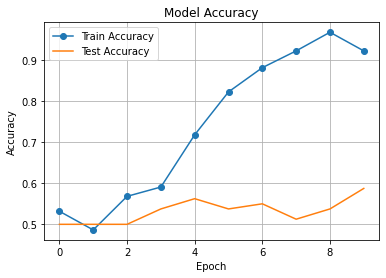

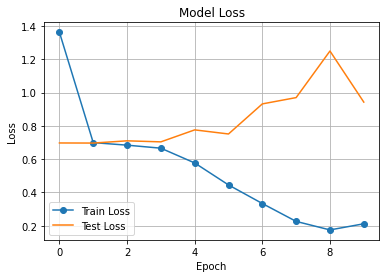

In [5]:
# 準確率曲線 
plt.plot(history.history['accuracy'], 'o-', label='Train Accuracy')  # 實心圓線
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 損失曲線 
plt.plot(history.history['loss'], 'o-', label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')  
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# 取出訓練歷程並整理為 DataFrame
history_df = pd.DataFrame(history.history)
history_df.index += 1  # 讓 epoch 從 1 開始

# 重新命名欄位（對應你要的格式）
history_df.columns = ['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy']
history_df.index.name = 'Epoch'

# 小數四捨五入到第4位
rounded_df = history_df.round(4)

# 印出表格
print(tabulate(rounded_df, headers='keys', tablefmt='grid', showindex=True, stralign='left', numalign='left'))

+---------+--------------+------------------+-------------+-----------------+
| Epoch   | Train Loss   | Train Accuracy   | Test Loss   | Test Accuracy   |
+=========+==============+==================+=============+=================+
| 1       | 1.3633       | 0.5318           | 0.6975      | 0.5             |
+---------+--------------+------------------+-------------+-----------------+
| 2       | 0.6995       | 0.4864           | 0.6969      | 0.5             |
+---------+--------------+------------------+-------------+-----------------+
| 3       | 0.6843       | 0.5682           | 0.7103      | 0.5             |
+---------+--------------+------------------+-------------+-----------------+
| 4       | 0.6661       | 0.5909           | 0.7041      | 0.5375          |
+---------+--------------+------------------+-------------+-----------------+
| 5       | 0.5773       | 0.7182           | 0.7762      | 0.5625          |
+---------+--------------+------------------+-------------+-----